<a href="https://colab.research.google.com/github/davidrtorres/Deep_Learning/blob/main/ImageProcess_Read_%26_Show_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import glob
import cv2
from google.colab.patches import cv2_imshow
import os
from skimage import io

### Reading and Showing Images in Python
For any image processing you need to first load the image(s) into a program and then show the images.  Below I will show how to accomplish these tasks.<br>
The 2 primary libraries used for Image processing are scikit-image and OpenCV.  The installation codes are pip install scikit-image and pip install opencv-python.  You can also use the libray PIL (Pillow)
to read images but the images aren't imported as numpy arrays.  If using PIL the image needs to be convert to a numpy array using numpy.asarray() prior to processing operations. Both these libraries are used if you want to load single images.  I would like to point out that we may use a library such a scikit-image to load an image but we may use another library like matplotlib to show the image.

This notebook is based on the video series by Apeer_micro https://www.youtube.com/watch?v=Z90KEqJoC3w&list=PLHae9ggVvqPgyRQQOtENr6hK0m1UquGaG&index=28.

### Scikit-Image
When the image is loaded it will be a numpy array.  If it's black and white it will be a 2 dimensional numpy array.  If it's an RBG image then it's a 3 dimensional numpy array.  I used plt.imshow() to show the image.


In [2]:
from skimage import io

In [3]:
img = io.imread("/content/drive/MyDrive/datasets/PlantVillage_partial/Potato___Early_blight/04ee51b6-07e2-4182-84f8-46b22c8938a2___RS_Early.B 8091.JPG")

This is a numpy array.  It is y, x and the number of channels.  The image is 1104 in height, 1376 pixels in width of image and the 3 channels (red, green, blue).

In [4]:
img.shape

(256, 256, 3)

The image is a unit8 type which means the values go from 0 to 255.

In [5]:
img.dtype

dtype('uint8')

In [6]:
img

array([[[182, 180, 185],
        [181, 179, 184],
        [184, 182, 187],
        ...,
        [182, 179, 186],
        [182, 179, 186],
        [181, 178, 185]],

       [[188, 186, 191],
        [186, 184, 189],
        [188, 186, 191],
        ...,
        [187, 184, 191],
        [185, 182, 189],
        [180, 177, 184]],

       [[192, 190, 195],
        [190, 188, 193],
        [191, 189, 194],
        ...,
        [195, 192, 199],
        [192, 189, 196],
        [185, 182, 189]],

       ...,

       [[179, 173, 177],
        [159, 153, 157],
        [150, 144, 148],
        ...,
        [151, 146, 153],
        [145, 140, 147],
        [146, 141, 148]],

       [[164, 158, 162],
        [164, 158, 162],
        [157, 151, 155],
        ...,
        [144, 139, 146],
        [149, 144, 151],
        [137, 132, 139]],

       [[139, 133, 137],
        [165, 159, 163],
        [169, 163, 167],
        ...,
        [147, 142, 149],
        [147, 142, 149],
        [149, 144, 151]]

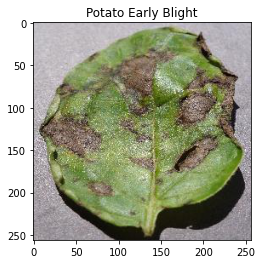

In [7]:
plt.title("Potato Early Blight")
plt.imshow(img);

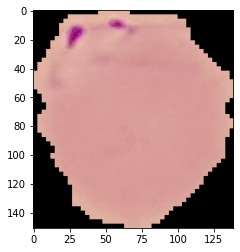

In [8]:
img2 = io.imread("/content/drive/MyDrive/datasets/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_164.png", as_gray=False)
plt.imshow(img2)

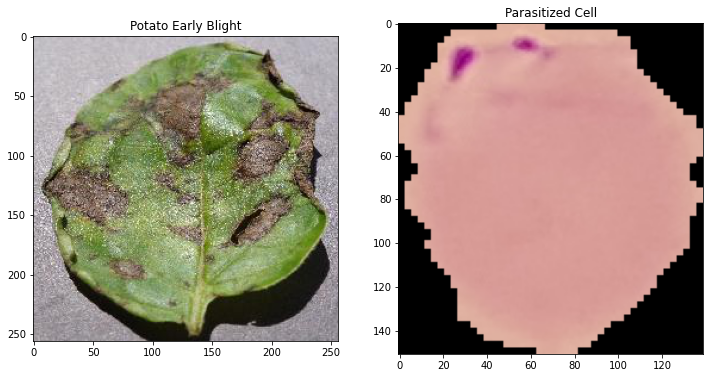

In [9]:
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(img, cmap='gray')
ax1.title.set_text('Potato Early Blight')
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(img2, cmap='gray')
ax2.title.set_text('Parasitized Cell')

### OpenCV
OpenCV reads images as BGR and not RBG.  The 0 or 1 indicates whether I want a grey or color image.  By default the value is 1.  You can also convert the image to RGB instead of BGR. 

In [10]:
import cv2

In [11]:
grey_img = cv2.imread("/content/drive/MyDrive/datasets/Osteosarcoma_01.tif",0)
color_img = cv2.imread("/content/drive/MyDrive/datasets/Osteosarcoma_01.tif",1)

In [12]:
print(grey_img.shape)
print(color_img.shape)

(1104, 1376)
(1104, 1376, 3)


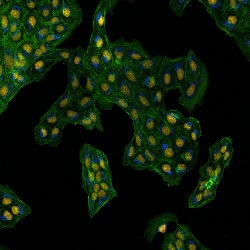

In [13]:
img_Opencv = cv2.cvtColor(color_img, cv2.COLOR_BGR2RGB)
imS = cv2.resize(img_Opencv, (250, 250)) 
cv2_imshow(imS)

### Using Glob to Read Multiple Files in Python
Using Glob to read multiple files into Python.  With Image processing you're propoably going to be using mutliple images.  For Image Processing you need a process to load mutliple images into Python and then apply operations to them.  Glob helps to identify all the file names in a list at a location.  Below shows a Python list of all files/images in this directory.<br>
I used glob.glob to extract the file names.  Once I have the file names extracted I can open them and perform operations on the files. 

In [14]:
print(os.listdir("/content/drive/MyDrive/datasets/Train_images/"))

['Sandstone_Versa0400.tif', 'Sandstone_Versa0350.tif', 'Sandstone_Versa0100.tif', 'Sandstone_Versa0200.tif', 'Sandstone_Versa0250.tif', 'Sandstone_Versa0300.tif', 'Sandstone_Versa0050.tif', 'Sandstone_Versa0150.tif', 'Sandstone_Versa0000.tif', 'Sand_images47.tif', 'Sand_images48.tif', 'Sand_images49.tif', 'Sand_images50.tif', 'Sand_images1.tif', 'Sand_images51.tif', 'Sand_images52.tif', 'Sand_images53.tif', 'Sand_images54.tif', 'Sand_images55.tif', 'Sand_images2.tif', 'Sand_images5.tif', 'Sand_images3.tif', 'Sand_images4.tif', 'Sand_images6.tif', 'Sand_images11.tif', 'Sand_images9.tif', 'Sand_images10.tif', 'Sand_images8.tif', 'Sand_images7.tif', 'Sand_images12.tif', 'Sand_images13.tif', 'Sand_images14.tif', 'Sand_images16.tif', 'Sand_images15.tif', 'Sand_images17.tif', 'Sand_images19.tif', 'Sand_images21.tif', 'Sand_images18.tif', 'Sand_images20.tif', 'Sand_images22.tif', 'Sand_images23.tif', 'Sand_images26.tif', 'Sand_images25.tif', 'Sand_images24.tif', 'Sand_images28.tif', 'Sand_ima

I'm going to load each of the files in the list with a for loop.  In the for loop I'm also going to perform certain operations on each file.  I created an empty list train_iamges because I want to store the files that were read with the operations.  I can then show images from the train_images list.

/content/drive/MyDrive/datasets/test_images_air_bike_car/bicycle/test_3.jpg
/content/drive/MyDrive/datasets/test_images_air_bike_car/bicycle/test_1.jpg
/content/drive/MyDrive/datasets/test_images_air_bike_car/bicycle/test_2.JPG


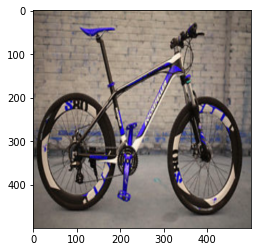

In [15]:
SIZE_X = 500
SIZE_Y = 500

train_images = []

path = '/content/drive/MyDrive/datasets/test_images_air_bike_car/bicycle/*.*' #'/content/drive/MyDrive/datasets/Train_images/*.*'
for file in glob.glob(path):
  print(file)
  #want to read the file
  a = cv2.imread(file)
  b = cv2.resize(a, (SIZE_Y, SIZE_X))
  #append the values you get from a
  train_images.append(b)
#view images from the stored list. Show 3rd image from train_images
plt.imshow(train_images[2])
plt.show()

I am processing each image.  I resized and converted each image from BGR to RGB. Then I write the image back into a folder called Plane_images.  The images can now be access from thi folder.

In [16]:
from google.colab.patches import cv2_imshow

//content/drive/MyDrive/datasets/test_images_sreeni/aeroplane/2.jpg


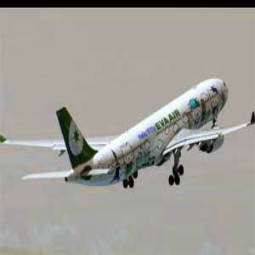

//content/drive/MyDrive/datasets/test_images_sreeni/aeroplane/1.jpg


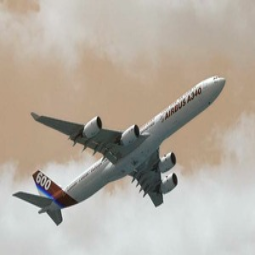

//content/drive/MyDrive/datasets/test_images_sreeni/aeroplane/3.jpg


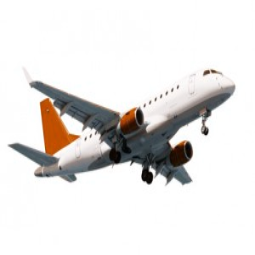

//content/drive/MyDrive/datasets/test_images_sreeni/aeroplane/4.jpg


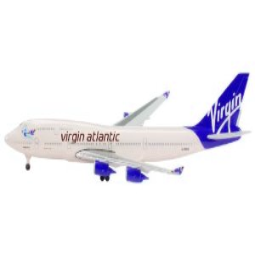

In [17]:
SIZE_Y = 255
SIZE_X = 255
path = '//content/drive/MyDrive/datasets/test_images_sreeni/aeroplane/*.*'
img_number =1
for file in glob.glob(path):
  print(file)
  #want to read the file
  a = cv2.imread(file)
  #resize the images
  a = cv2.resize(a, (SIZE_Y, SIZE_X))
  #process each image - change color from BGR to RGB
  c = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
  cv2.imwrite('/content/drive/MyDrive/datasets/Practice/Plane_images' + str(img_number) + '.jpg',c)
  img_number += 1
  cv2_imshow(c)
  cv2.waitKey(0)
  cv2.destroyAllWindows()

If working with image file with different image extensions.

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


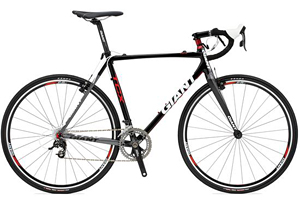

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


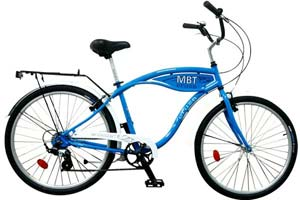

[[[102  91  77]
  [105  94  80]
  [106  95  81]
  ...
  [ 72  69  61]
  [ 77  74  66]
  [ 79  76  68]]

 [[ 91  79  67]
  [104  92  80]
  [113 101  89]
  ...
  [ 99  93  86]
  [103  97  90]
  [105  99  92]]

 [[ 89  78  70]
  [102  91  83]
  [112 101  93]
  ...
  [113 104  95]
  [115 106  97]
  [116 107  98]]

 ...

 [[101  93  86]
  [101  93  86]
  [102  94  87]
  ...
  [102  99  94]
  [102  99  94]
  [102  99  94]]

 [[ 98  90  83]
  [ 99  91  84]
  [100  92  85]
  ...
  [101  98  93]
  [101  98  93]
  [101  98  93]]

 [[ 96  88  81]
  [ 97  89  82]
  [ 99  91  84]
  ...
  [101  98  93]
  [101  98  93]
  [101  98  93]]]


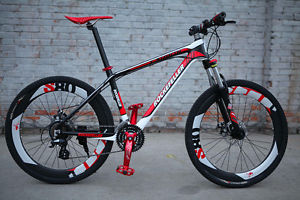

In [18]:
for img in glob.glob("/content/drive/MyDrive/datasets/test_images_air_bike_car/bicycle/*"):
    if (img.endswith(".png") or img.endswith(".jpg")\
        or img.endswith(".jpeg") or img.endswith(".JPG")):
        # display
        cv_img = cv2.imread(img)
        print(cv_img)
        cv2_imshow(cv_img)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

### Using OS.listdir to Read Multiple Files in Python 
Library returns a list containing the names of the file names in the path.

In [19]:
import os

In [20]:
from PIL import Image

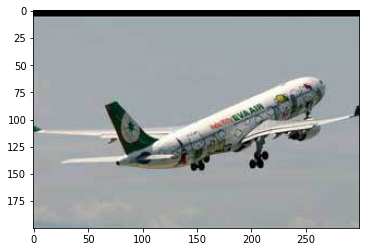

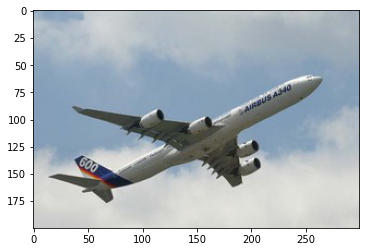

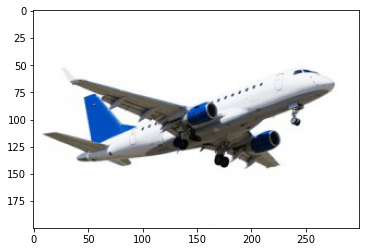

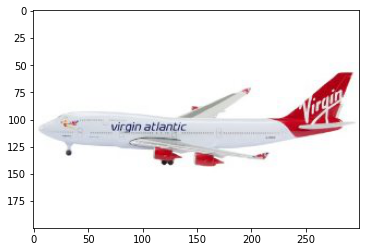

In [21]:
path = '/content/drive/MyDrive/datasets/test_images_sreeni/aeroplane/'

files = os.listdir(path) # file path

for idx, image_path in enumerate(files):

  image = Image.open(f'{path}{image_path}',"r") 
  #plt.subplot(2,2,idx+1)
  
  plt.imshow(image) 
  plt.show()